<a href="https://colab.research.google.com/github/mart1428/CreditCardApplicationDecision/blob/main/CreditCardApplicationDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Library Imports**

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree




---

# **Dataset Download**

---

Data has already been uploaded on gdrive. The link has been modified to be a downloadable link.

In [2]:
label_link = "https://docs.google.com/uc?export=download&id=1LKBLmwmyWJc1n8GBX5ZKu0yo7sZDmHjg"
data_link = "https://docs.google.com/uc?export=download&id=1A3Rs4JWB7evyPhptTsbcJmFcMm4gVwGR"

labels = pd.read_csv(label_link)
data = pd.read_csv(data_link)

# labels.set_index('Ind_ID')
# data.set_index('Ind_ID')


# Exploratory Data Analysis

In [3]:
print(labels.head())
print(labels.shape)
print(data.head())
print(data.shape)

    Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1
(1548, 2)
    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / 

###Getting a better understanding of the Categorical data. This is to get a good knowledge on what kind of data that is available and how many data points are in a specific category.

In [4]:
print(data[['Type_Income']].groupby(['Type_Income']).size(), '\n')
print(data[['GENDER']].groupby(['GENDER']).size(), '\n')
print(data[['Car_Owner']].groupby(['Car_Owner']).size(), '\n')
print(data[['Propert_Owner']].groupby(['Propert_Owner']).size(), '\n')
print(data[['EDUCATION']].groupby(['EDUCATION']).size(), '\n')
print(data[['Marital_status']].groupby(['Marital_status']).size(), '\n')
print(data[['Housing_type']].groupby(['Housing_type']).size(), '\n')
print(data[['EMAIL_ID']].groupby(['EMAIL_ID']).size(), '\n')
print(data[['Type_Occupation']].groupby(['Type_Occupation']).size(), '\n')


Type_Income
Commercial associate    365
Pensioner               269
State servant           116
Working                 798
dtype: int64 

GENDER
F    973
M    568
dtype: int64 

Car_Owner
N    924
Y    624
dtype: int64 

Propert_Owner
N     538
Y    1010
dtype: int64 

EDUCATION
Academic degree                     2
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Secondary / secondary special    1031
dtype: int64 

Marital_status
Civil marriage           101
Married                 1049
Separated                 96
Single / not married     227
Widow                     75
dtype: int64 

Housing_type
Co-op apartment           5
House / apartment      1380
Municipal apartment      53
Office apartment          9
Rented apartment         21
With parents             80
dtype: int64 

EMAIL_ID
0    1405
1     143
dtype: int64 

Type_Occupation
Accountants               44
Cleaning staff            22
Cooking staff            

Checking for data types in each rows.

In [5]:
print(data.dtypes)

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
dtype: object


##**Columns sorting and dropping**
 The columns will be re-arranged so that it consists of individual id, categorical columns and numerical columns. There are also columns that are being dropped such that Gender \(to avoid bias), Mobile Phone number, Email Id, etc. This is mostly to avoid bias and unnecessary columns. For example, we do not need someone's phone number to decide if they are a good candidate for a credit card.

In [6]:

cols = data.columns.to_list()
columns_sorted = cols[:1] + cols[2:4] + cols[6:10] + cols[-2:-1] + cols[5:6] + cols[10:12] + cols[16:-2] + cols[-1:]
data_sorted = data[columns_sorted]


cat_cols = columns_sorted[1:8]
num_cols = columns_sorted[8:]
print(data_sorted.head())

data_sorted.replace('Nan', np.nan, inplace = True)

data_sorted[num_cols] = data_sorted[num_cols].apply(lambda x : x.astype(float))
print(data_sorted.dtypes)



    Ind_ID Car_Owner Propert_Owner           Type_Income         EDUCATION  \
0  5008827         Y             Y             Pensioner  Higher education   
1  5009744         Y             N  Commercial associate  Higher education   
2  5009746         Y             N  Commercial associate  Higher education   
3  5009749         Y             N  Commercial associate  Higher education   
4  5009752         Y             N  Commercial associate  Higher education   

  Marital_status       Housing_type Type_Occupation  Annual_income  \
0        Married  House / apartment             NaN       180000.0   
1        Married  House / apartment             NaN       315000.0   
2        Married  House / apartment             NaN       315000.0   
3        Married  House / apartment             NaN            NaN   
4        Married  House / apartment             NaN       315000.0   

   Birthday_count  Employed_days  Family_Members  
0        -18772.0         365243               2  
1       

<ipython-input-6-5d913ba169b9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sorted.replace('Nan', np.nan, inplace = True)
<ipython-input-6-5d913ba169b9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sorted[num_cols] = data_sorted[num_cols].apply(lambda x : x.astype(float))


##**Data Imputer**
---
This is to fill in missing data. There are 2 strategies that are being used. The first one is to use average of its columns in filling numerical columns. The second one is to use mode or most frequent data to fill in Categorical data.

In [7]:
numImputer = SimpleImputer(strategy='mean')
numImputer.fit(data_sorted[num_cols])
data_sorted[num_cols] = numImputer.transform(data_sorted[num_cols])

catImputer = SimpleImputer(strategy = 'most_frequent')
catImputer.fit(data_sorted[cat_cols])
data_sorted[cat_cols] = catImputer.transform(data_sorted[cat_cols])


<ipython-input-7-f66569765058>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sorted[num_cols] = numImputer.transform(data_sorted[num_cols])
<ipython-input-7-f66569765058>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sorted[cat_cols] = catImputer.transform(data_sorted[cat_cols])


##**Data encoding**
---
Ordinal Encoder from scikit-learn library will be used here to encode categorical data.

In [8]:
encoder = OrdinalEncoder()
encoder.fit(data_sorted[cat_cols])
data_sorted[cat_cols] = encoder.transform(data_sorted[cat_cols])

<ipython-input-8-1de8cc8608d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sorted[cat_cols] = encoder.transform(data_sorted[cat_cols])


In [9]:
data_sorted.head()

,Ind_ID,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation,Annual_income,Birthday_count,Employed_days,Family_Members
0,5008827,1.0,1.0,1.0,1.0,1.0,1.0,8.0,180000.00000,-18772.000000,365243.0,2.0
1,5009744,1.0,0.0,0.0,1.0,1.0,1.0,8.0,315000.00000,-13557.000000,-586.0,2.0
2,5009746,1.0,0.0,0.0,1.0,1.0,1.0,8.0,315000.00000,-16040.342071,-586.0,2.0
3,5009749,1.0,0.0,0.0,1.0,1.0,1.0,8.0,191399.32623,-13557.000000,-586.0,2.0
4,5009752,1.0,0.0,0.0,1.0,1.0,1.0,8.0,315000.00000,-13557.000000,-586.0,2.0


Correlation between columns are being checked to make sure they are independent.

                   Ind_ID  Car_Owner  Propert_Owner  Type_Income  EDUCATION  \
Ind_ID           1.000000  -0.046811      -0.050421     0.026832   0.020761   
Car_Owner       -0.046811   1.000000       0.002401     0.033180  -0.131209   
Propert_Owner   -0.050421   0.002401       1.000000    -0.057481  -0.018622   
Type_Income      0.026832   0.033180      -0.057481     1.000000   0.100511   
EDUCATION        0.020761  -0.131209      -0.018622     0.100511   1.000000   
Marital_status   0.014426  -0.135318       0.004493    -0.032925   0.051966   
Housing_type     0.024882  -0.001358      -0.174783     0.025516  -0.044552   
Type_Occupation  0.049493  -0.082761       0.013962    -0.080690   0.040761   
Annual_income    0.029888   0.209528       0.043927    -0.132934  -0.243989   
Birthday_count   0.022778   0.144107      -0.124128     0.171432  -0.189547   
Employed_days   -0.055396  -0.150658       0.100686    -0.309174   0.128430   
Family_Members   0.016950   0.119851      -0.004458 

<Axes: >

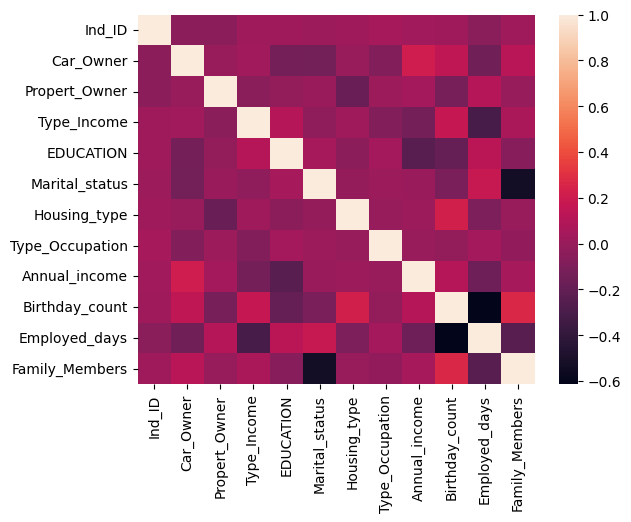

In [10]:
corrs = data_sorted.corr()
print(corrs)
sns.heatmap(corrs, annot = False)

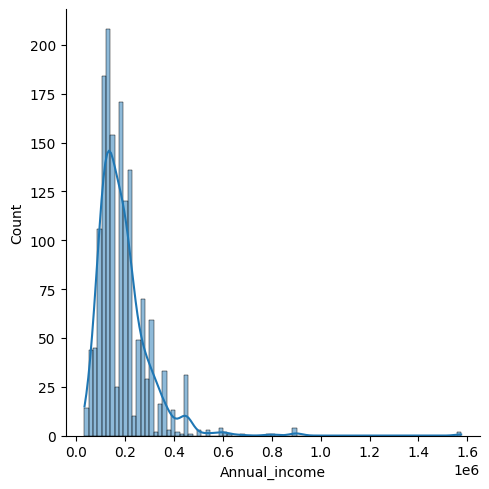

In [25]:
sns.displot(data = data_sorted.Annual_income, kde = True)

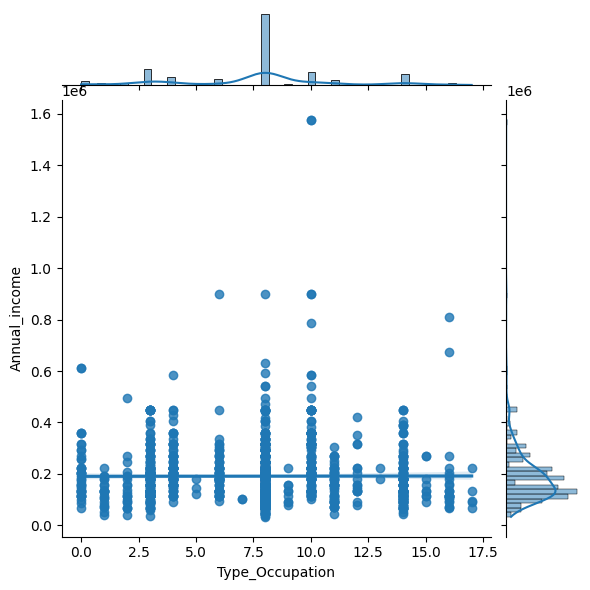

In [26]:
sns.jointplot(data = data_sorted, x = 'Type_Occupation', y='Annual_income', kind = 'reg')

###Data are being joined with its label using Individual ID as the primary key.
 The labels are then being checked. Here, it is found that the number of people that are being rejected is a lot smaller that people that are being accepted. This causes a huge issue when training the ML models since it will overfit to people who are being accepted for the credit card.

In [27]:
processed_data = pd.concat([data_sorted, labels], axis = 1, ignore_index = True,  keys = 'Ind_ID')
col_names = ['Ind_ID', 'CarOwner', 'PropertyOwner', 'IncomeType', 'Education', 'MaritalStatus', 'HousingType', 'OccupationType', 'AnnualIncome', 'Birthday', 'DaysEmployed', 'FamilyMembers', 'Ind_ID2', 'Rejected?']
processed_data.columns = col_names
processed_data.drop(['Ind_ID', 'Ind_ID2'], axis = 1, inplace = True)
print(processed_data.groupby('Rejected?').size())

Rejected?
0    1373
1     175
dtype: int64


A quick check to see if there's any visible correlation between Rejection and other columns.

CarOwner         -0.014734
PropertyOwner    -0.017906
IncomeType       -0.067856
Education        -0.027040
MaritalStatus     0.057885
HousingType      -0.001610
OccupationType   -0.013783
AnnualIncome      0.026875
Birthday         -0.044831
DaysEmployed      0.031408
FamilyMembers    -0.030709
Rejected?         1.000000
Name: Rejected?, dtype: float64


<Axes: >

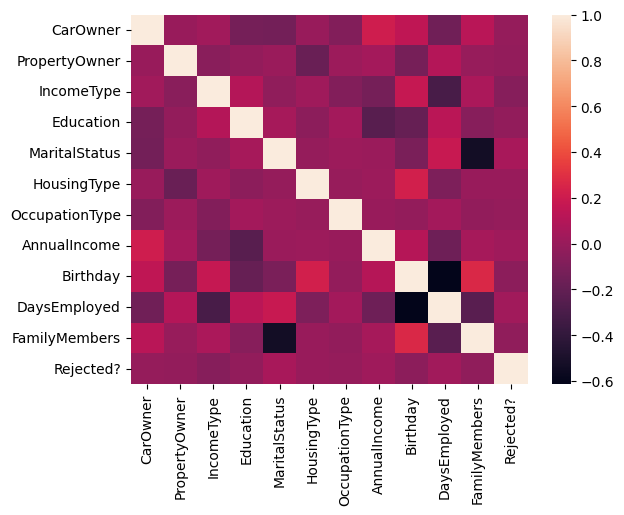

In [14]:
corrs = processed_data.corr()
print(corrs['Rejected?'])
sns.heatmap(corrs)

In [28]:
split = 0.8
trueIndex = processed_data[processed_data['Rejected?'] == 1].index
trueIndexTrain = trueIndex[:int(0.8*len(trueIndex))]
trueIndexTest = trueIndex[int(0.8*len(trueIndex)):]

falseIndex = processed_data[processed_data['Rejected?'] == 0].index.to_list()
falseIndexTrain = falseIndex[:int(0.8*len(trueIndex))]
falseIndexTest = falseIndex[int(0.8*len(trueIndex)):len(trueIndex)] #Rejected data are being sub sample

split = int(0.85 * len(processed_data))
df_train, df_test = pd.concat([processed_data.iloc[trueIndexTrain], processed_data.iloc[falseIndexTrain]], axis = 0) , pd.concat([processed_data.iloc[trueIndexTest], processed_data.iloc[falseIndexTest]], axis = 0)

X_train, y_train = df_train.drop('Rejected?', axis = 1), df_train['Rejected?']
X_test, y_test = df_test.drop('Rejected?', axis = 1), df_test['Rejected?']

# **Machine Learning Models**
---
Logistic Regression with Cross Validation

In [35]:
logreg = sklearn.linear_model.LogisticRegressionCV(random_state = 1000, solver = 'saga', penalty = 'l1', max_iter = 5000).fit(X_train,y_train)

logreg_score = logreg.score(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print(f'The score is: {logreg_score:.3f}')

The score is: 0.539


In [36]:
col_names = [ 'CarOwner', 'PropertyOwner', 'IncomeType', 'Education', 'MaritalStatus', 'HousingType', 'OccupationType', 'AnnualIncome', 'Birthday', 'DaysEmployed', 'FamilyMembers']
coefs = pd.Series(logreg.coef_[0], index = X_train.columns)
coefs

CarOwner          0.000000e+00
PropertyOwner     0.000000e+00
IncomeType        0.000000e+00
Education         0.000000e+00
MaritalStatus     0.000000e+00
HousingType       0.000000e+00
OccupationType    0.000000e+00
AnnualIncome     -5.118003e-07
Birthday         -2.962206e-06
DaysEmployed      1.067966e-06
FamilyMembers     0.000000e+00
dtype: float64

Recall score is: 0.2571428571428571
Precision score is: 0.42857142857142855


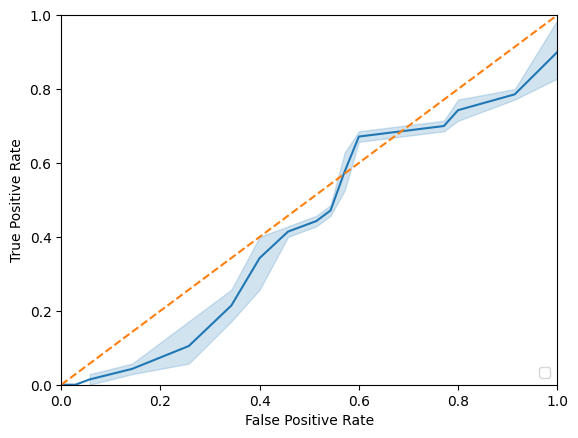

In [41]:
from sklearn.metrics import roc_curve, precision_score, recall_score

recall = recall_score(y_test, y_pred_logreg)
print(f'Recall score is: {recall}')

precision = precision_score(y_test, y_pred_logreg)
print(f'Precision score is: {precision}')


fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
sns.lineplot(x = fpr, y= tpr)


# -------------------

# Plot format
sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--')  # add red line
plt.xlim([0.0, 1.0])  # limit x-axis between 0 and 1
plt.ylim([0.0, 1.0])  # limit y-axis between 0 and 1
plt.xlabel('False Positive Rate')  # lable for x axis
plt.ylabel('True Positive Rate')  # lable for y axis
plt.legend(loc='lower right')  # print legend in lower right corner
plt.show()



---



Decision Tree

In [39]:
tree = sklearn.tree.DecisionTreeClassifier(random_state = 1000).fit(X_train, y_train)

tree_score = tree.score(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(f'The score is: {tree_score:.3f}')

The score is: 1.000


Recall score is: 0.45714285714285713
Precision score is: 0.5925925925925926


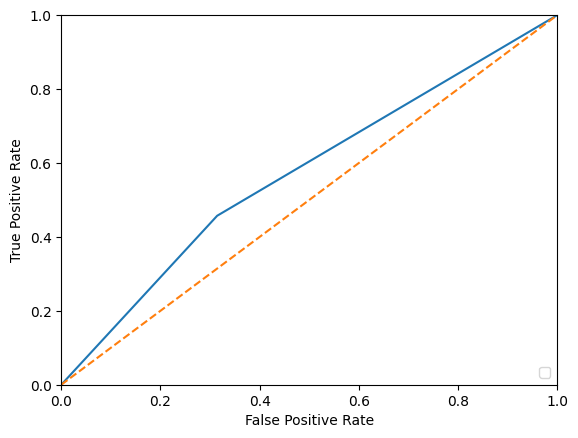

In [42]:
recall = recall_score(y_test, y_pred_tree)
print(f'Recall score is: {recall}')

precision = precision_score(y_test, y_pred_tree)
print(f'Precision score is: {precision}')


fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])
sns.lineplot(x = fpr, y= tpr)


# -------------------

# Plot format
sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--')  # add red line
plt.xlim([0.0, 1.0])  # limit x-axis between 0 and 1
plt.ylim([0.0, 1.0])  # limit y-axis between 0 and 1
plt.xlabel('False Positive Rate')  # lable for x axis
plt.ylabel('True Positive Rate')  # lable for y axis
plt.legend(loc='lower right')  # print legend in lower right corner
plt.show()

In [43]:
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph

knn = KNeighborsClassifier(2).fit(X_train, y_train)

print(f'KNN Training Score: {knn.score(X_train, y_train)}')
print(f'KNN Testing Score: {knn.score(X_test, y_test)}')


y_pred_knn = knn.predict(X_test)

KNN Training Score: 0.875
KNN Testing Score: 0.4142857142857143


In [45]:
(y_pred_knn == y_test).astype(int).sum()

29

Recall score is: 0.14285714285714285
Precision score is: 0.3125


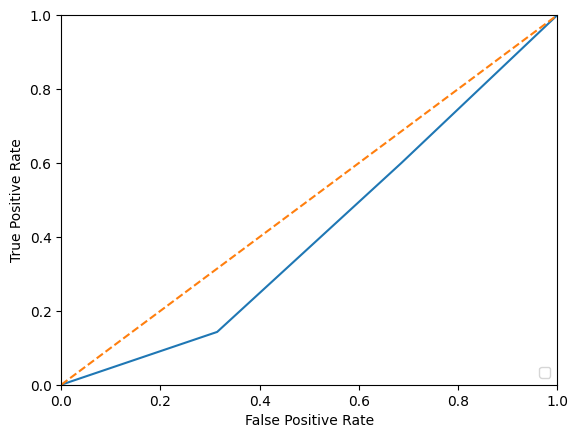

In [47]:
recall = recall_score(y_test, y_pred_knn)
print(f'Recall score is: {recall}')

precision = precision_score(y_test, y_pred_knn)
print(f'Precision score is: {precision}')


fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
sns.lineplot(x = fpr, y= tpr)


# -------------------

# Plot format
sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--')  # add red line
plt.xlim([0.0, 1.0])  # limit x-axis between 0 and 1
plt.ylim([0.0, 1.0])  # limit y-axis between 0 and 1
plt.xlabel('False Positive Rate')  # lable for x axis
plt.ylabel('True Positive Rate')  # lable for y axis
plt.legend(loc='lower right')  # print legend in lower right corner
plt.show()

In [49]:
reduced_df_train, reduced_df_test = df_train[['AnnualIncome', 'Birthday', 'DaysEmployed', 'Rejected?']], df_test[['AnnualIncome', 'Birthday', 'DaysEmployed', 'Rejected?']]

X_train, y_train = reduced_df_train.drop('Rejected?', axis = 1), reduced_df_train['Rejected?']
X_test, y_test = reduced_df_test.drop('Rejected?', axis = 1), reduced_df_test['Rejected?']

In [56]:
import xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, y_train)

print(f'XGB Model Training Score: {xgb_model.score(X_train, y_train)}')
print(f'XGB Model Testing Score: {xgb_model.score(X_test, y_test)}')

y_pred_xgb = xgb_model.predict(X_test)

XGB Model Training Score: 1.0
XGB Model Testing Score: 0.4714285714285714


Recall score is: 0.34285714285714286
Precision score is: 0.46153846153846156


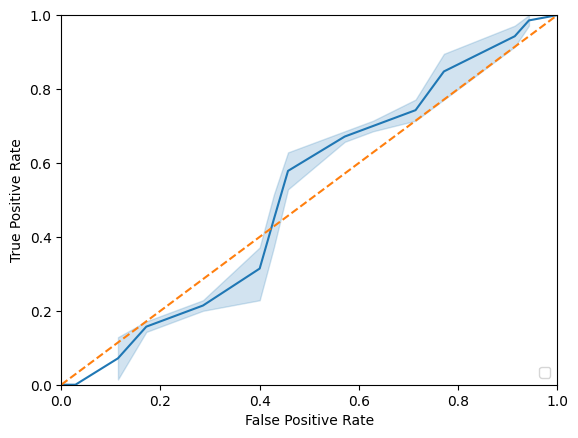

In [57]:
recall = recall_score(y_test, y_pred_xgb)
print(f'Recall score is: {recall}')

precision = precision_score(y_test, y_pred_xgb)
print(f'Precision score is: {precision}')


fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
sns.lineplot(x = fpr, y= tpr)


# -------------------

# Plot format
sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--')  # add red line
plt.xlim([0.0, 1.0])  # limit x-axis between 0 and 1
plt.ylim([0.0, 1.0])  # limit y-axis between 0 and 1
plt.xlabel('False Positive Rate')  # lable for x axis
plt.ylabel('True Positive Rate')  # lable for y axis
plt.legend(loc='lower right')  # print legend in lower right corner
plt.show()